In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [213]:
train= pd.read_csv(r'C:\Users\aishw\Downloads\EDA1-master\EDA1-master\titanic_train.csv')

In [214]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

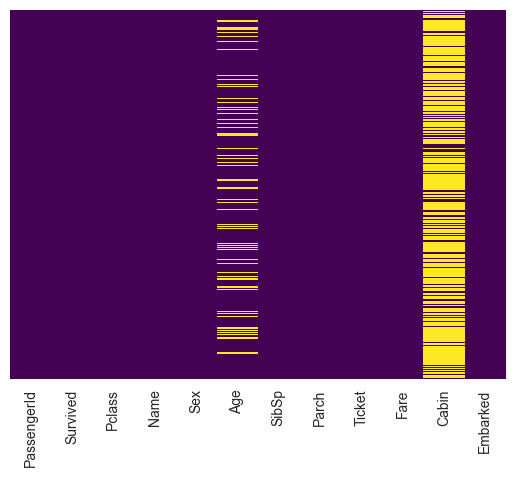

In [216]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: xlabel='Survived', ylabel='count'>

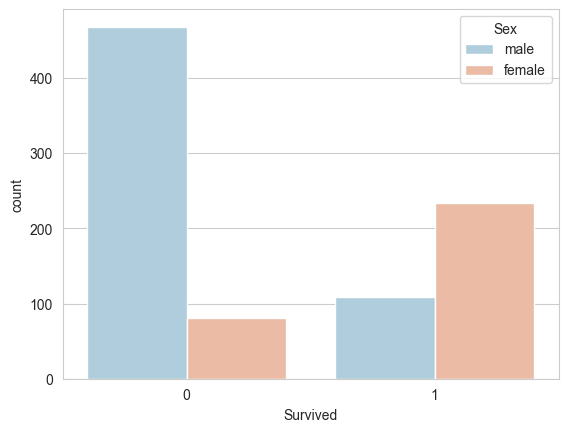

In [217]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

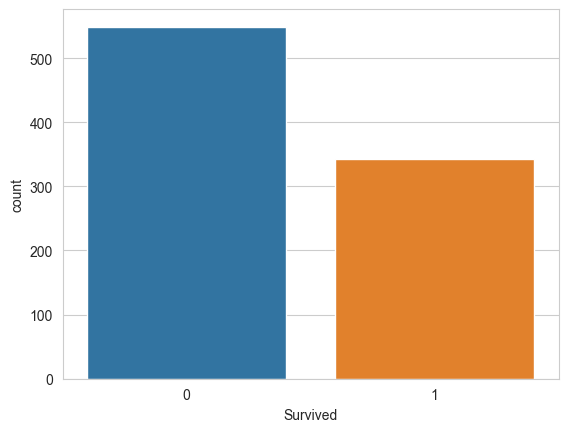

In [218]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

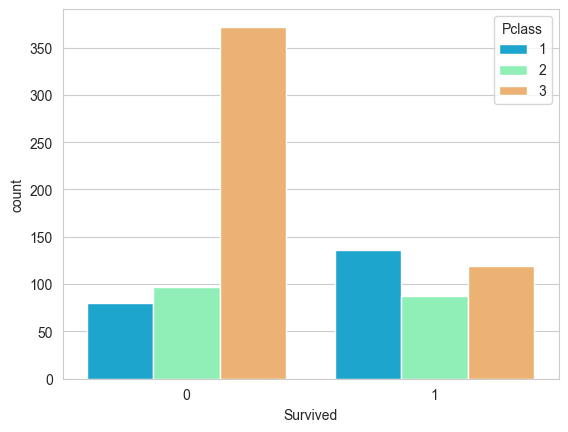

In [219]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\aishw\AppData\Local\Temp\ipykernel_12632\2002818437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<AxesSubplot: xlabel='Age'>

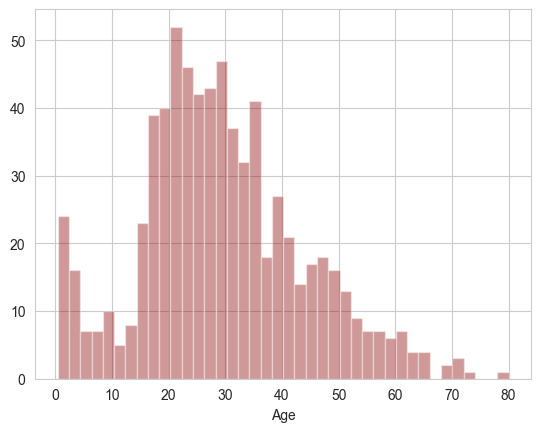

In [220]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot: >

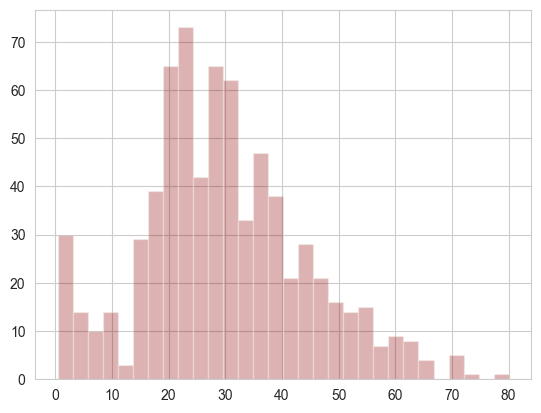

In [221]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

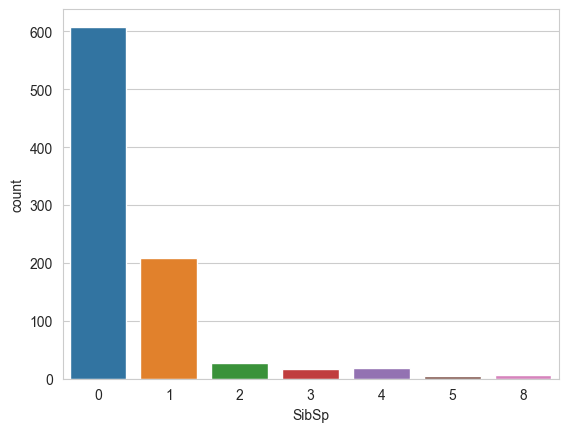

In [222]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot: >

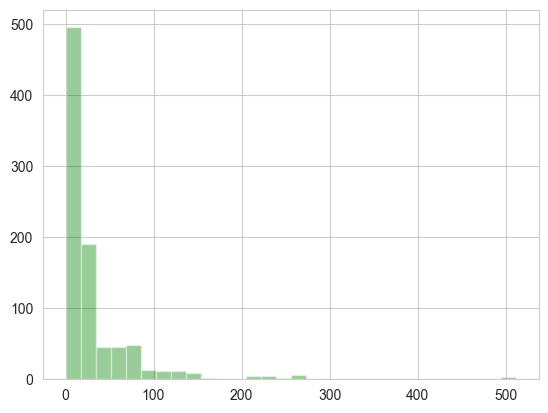

In [223]:
train['Fare'].hist(color='green',bins=30,alpha=0.4)

<AxesSubplot: xlabel='Fare', ylabel='count'>

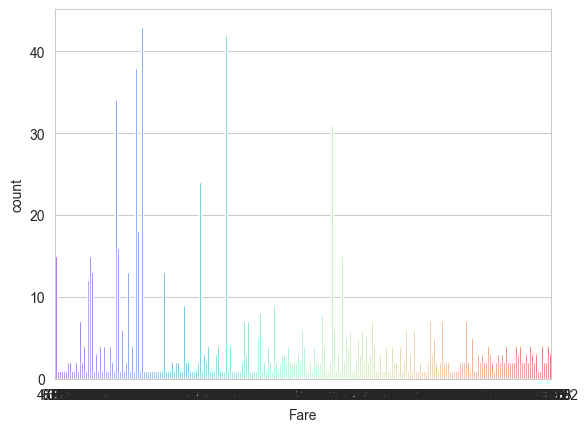

In [224]:
sns.countplot(x='Fare',data=train,palette='rainbow')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

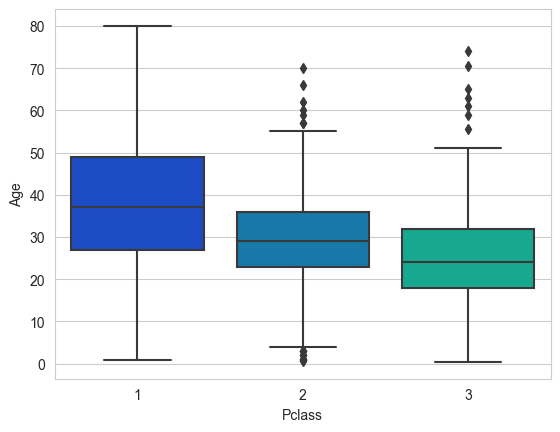

In [225]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [226]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [227]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot: >

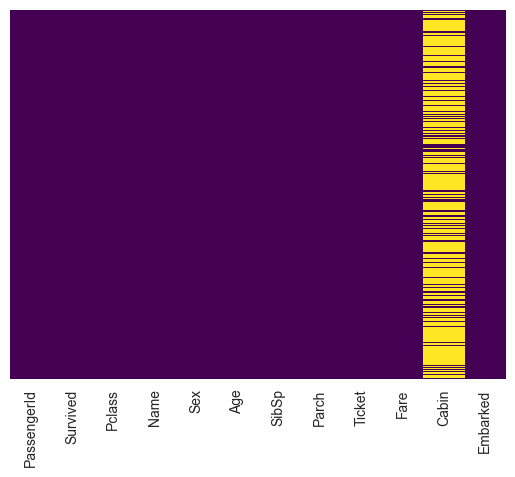

In [228]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [229]:
train.drop('Cabin', axis=1,inplace=True)

In [230]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [232]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [233]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [234]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [235]:
train.drop(['Sex','Embarked','Name','Ticket','Fare'],axis=1,inplace=True)

In [236]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,3,22.0,1,0
1,2,1,1,38.0,1,0
2,3,1,3,26.0,0,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,0


In [237]:
train=pd.concat([train,sex,embark],axis=1)

In [238]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.0,1,0,1,0,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,0,1
3,4,1,1,35.0,1,0,0,0,1
4,5,0,3,35.0,0,0,1,0,1


In [239]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S
0,1,3,22.0,1,0,1,0,1
1,2,1,38.0,1,0,0,0,0
2,3,3,26.0,0,0,0,0,1
3,4,1,35.0,1,0,0,0,1
4,5,3,35.0,0,0,1,0,1


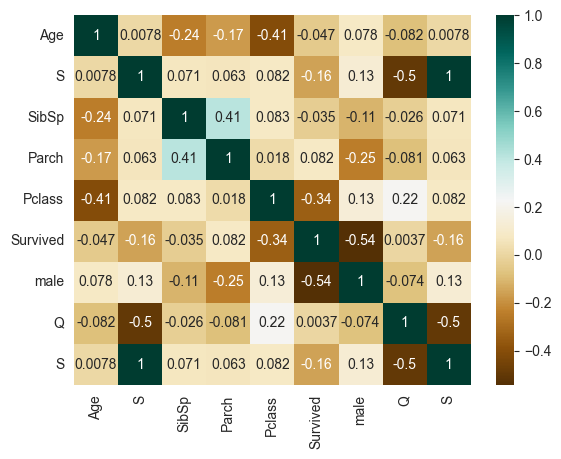

In [240]:
sns.heatmap(train[["Age","S","SibSp","Parch","Pclass","Survived","male","Q","S"]].corr(),cmap="BrBG",annot=True)


In [241]:
train["Fsize"] = train["SibSp"] + train["Parch"] + 1

In [244]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S,Fsize
0,1,0,3,22.0,1,0,1,0,1,2
1,2,1,1,38.0,1,0,0,0,0,2
2,3,1,3,26.0,0,0,0,0,1,1
3,4,1,1,35.0,1,0,0,0,1,2
4,5,0,3,35.0,0,0,1,0,1,1


In [246]:
train.drop(["SibSp","Parch"],axis=1)

,PassengerId,Survived,Pclass,Age,male,Q,S,Fsize
0,1,0,3,22.0,1,0,1,2
1,2,1,1,38.0,0,0,0,2
2,3,1,3,26.0,0,0,1,1
3,4,1,1,35.0,0,0,1,2
4,5,0,3,35.0,1,0,1,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,1,0,1,1
887,888,1,1,19.0,0,0,1,1
888,889,0,3,24.0,0,0,1,4
889,890,1,1,26.0,1,0,0,1


In [242]:
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [243]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\aishw\appdata\local\programs\python\python311\lib\site-packages (0.12.2)




[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [208]:
import seaborn as sns

In [206]:
import seaborn.factorplot

ModuleNotFoundError: No module named 'seaborn.factorplot'

In [30]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [247]:
train['Single'] = train['Fsize'].map(lambda s: 1 if s == 1 else 0)
train['SmallF'] = train['Fsize'].map(lambda s: 1 if  s == 2  else 0)
train['MedF'] = train['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeF'] =train['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [252]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S,Fsize,Single,SmallF,MedF,LargeF
0,1,0,3,22.0,1,0,1,0,1,2,0,1,0,0
1,2,1,1,38.0,1,0,0,0,0,2,0,1,0,0
2,3,1,3,26.0,0,0,0,0,1,1,1,0,0,0
3,4,1,1,35.0,1,0,0,0,1,2,0,1,0,0
4,5,0,3,35.0,0,0,1,0,1,1,1,0,0,0


In [253]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from sklearn.model_selection import train_test_split

In [254]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [255]:
X_train,X_test,y_train,y_test=train_test_split(train.drop(['Survived','SibSp','Parch',axis=1),train['Survived'],test_size=0.3, random_state=101)

In [256]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [257]:
logmodel=RandomForestClassifier(n_estimators = 100)
logmodel.fit(X_train,y_train)

RandomForestClassifier()

In [258]:
predictions=logmodel.predict(X_test)

In [259]:
from sklearn.metrics import confusion_matrix

In [260]:
accuracy=confusion_matrix(y_test,predictions)

In [261]:
accuracy

array([[135,  19],
       [ 37,  77]], dtype=int64)

In [262]:
from sklearn.metrics import accuracy_score,classification_report,precision_score

In [263]:
accuracy=accuracy_score(y_test,predictions)
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.83       154\n           1       0.80      0.68      0.73       114\n\n    accuracy                           0.79       268\n   macro avg       0.79      0.78      0.78       268\nweighted avg       0.79      0.79      0.79       268\n'

In [264]:
accuracy

0.7910447761194029

In [265]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [266]:
from sklearn.ensemble import RandomForestClassifier
logmodel=RandomForestClassifier(n_estimators = 100)
logmodel.fit(X_train,y_train)

RandomForestClassifier()

In [267]:
predictions=logmodel.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.90      0.83       154\n           1       0.82      0.66      0.73       114\n\n    accuracy                           0.79       268\n   macro avg       0.80      0.78      0.78       268\nweighted avg       0.80      0.79      0.79       268\n'

In [268]:
accuracy

0.7947761194029851

In [269]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
classifier_feature = DecisionTreeClassifier()
classifier_feature.fit(X_train, y_train)
print(classification_report(y_test, classifier_feature.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       154
           1       0.75      0.61      0.68       114

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.75      0.75       268



In [270]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred1 = xgb_classifier.predict(X_test)
print("Accuracy of the model::",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

Accuracy of the model:: 0.8134328358208955
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       154
           1       0.88      0.65      0.75       114

    accuracy                           0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



In [271]:
from sklearn.naive_bayes import GaussianNB
model2  = GaussianNB()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
accuracy = accuracy_score(pred2,y_test)
print("Accuracy:",accuracy)
print(classification_report(pred2,y_test))

Accuracy: 0.7798507462686567
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       145
           1       0.78      0.72      0.75       123

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [272]:
from sklearn.naive_bayes import MultinomialNB
model3  = MultinomialNB()
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
accuracy = accuracy_score(pred3,y_test)
print("Accuracy:",accuracy)
print(classification_report(pred3,y_test))

Accuracy: 0.6492537313432836
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       186
           1       0.45      0.62      0.52        82

    accuracy                           0.65       268
   macro avg       0.62      0.64      0.62       268
weighted avg       0.69      0.65      0.66       268



In [273]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
pred4 = classifier.predict(X_test)
accuracy = accuracy_score(pred4,y_test)
print(classification_report(pred4,y_test))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73       268
           1       0.00      0.00      0.00         0

    accuracy                           0.57       268
   macro avg       0.50      0.29      0.36       268
weighted avg       1.00      0.57      0.73       268



C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [274]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


0.8057935483870968

In [275]:
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

gsExtC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.8186451612903225

In [276]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [76]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 5 folds for each of 112 candidates, totalling 560 fits


AttributeError: 'str' object has no attribute 'set_params'

In [68]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

TypeError: barplot() got multiple values for argument 'data'

In [66]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [81]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [80]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [79]:
!pip  install hyperopt

     ---------------------------------------- 1.6/1.6 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 840.9/840.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
     -------------------------------------- 200.5/200.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492055 sha256=cc3568221506bbdb5533cdcee5f405718518cecb6164cac81e82782550a0f2cd
  Stored in directory: c:\users\aishw\appdata\local\pip\cache\wheels\83\31\5a\7539ed9c6ac3249781de831638629a4fe503168023e1a777e2
Successfully built future



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [83]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
 34%|███████████████▋                   

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
 55%|█████████████████████████▎         

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
 81%|███████████████████████████████████

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                  

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
SCORE:                                                                                                                 
0.5746268656716418                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:03<00:00, 26.12trial/s, best loss: -0.5746268656716418]


C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\aishw\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

In [84]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7739864661657686, 'gamma': 2.703942383788042, 'max_depth': 4.0, 'min_child_weight': 7.0, 'reg_alpha': 171.0, 'reg_lambda': 0.14107688613905678}
